**Import the libraries**

In [0]:
from __future__ import print_function
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import FastICA

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras import metrics

from math import sqrt

from matplotlib import pyplot

from numpy import array

Using TensorFlow backend.


In [0]:
from hyperopt import Trials, STATUS_OK, tpe
from keras.layers.core import Dense, Dropout, Activation
from keras.models import Sequential
from keras.utils import np_utils
from hyperas import optim
from keras.models import model_from_json
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD , Adam,RMSprop
import tensorflow as tf
from hyperas.distributions import choice, quniform, conditional
from keras import backend as K
import pandas as pd
import numpy as np

**Read the residual values of the series from the local preprocessed csv file**

In [0]:
data=pd.read_csv("scaled_residual_df.csv",index_col=0,parse_dates=True,header=0)

In [0]:
data.describe()

,airtel,asian,cipla,hcl,hdfc,hindu,icici,infy,itc,kotak,...,ongc,power,reliance,indus,sun,tata,tcs,techm,vedl,lt
count,1.056000e+03,1.056000e+03,1.056000e+03,1.056000e+03,1.056000e+03,1.056000e+03,1.056000e+03,1.056000e+03,1.056000e+03,1.056000e+03,...,1.056000e+03,1.056000e+03,1.056000e+03,1.056000e+03,1.056000e+03,1.056000e+03,1.056000e+03,1.056000e+03,1.056000e+03,1.056000e+03
mean,-2.239370e-16,1.703183e-16,-1.755750e-16,8.108518e-17,-7.674837e-17,-2.498002e-16,1.744186e-16,-1.195382e-16,7.685351e-17,-6.696033e-16,...,9.842584e-17,1.342571e-16,-9.846264e-16,-2.812355e-16,-7.355490e-17,1.011396e-16,1.017704e-16,-2.405483e-16,-3.086756e-16,1.152540e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.231072e+00,-2.894244e+00,-3.454078e+00,-2.018683e+00,-3.252639e+00,-3.898366e+00,-1.872940e+00,-1.980389e+00,-2.324817e+00,-1.640599e+00,...,-2.224319e+00,-2.313615e+00,-1.892845e+00,-3.337456e+00,-3.489643e+00,-2.610346e+00,-4.775725e+00,-1.637713e+00,-2.293472e+00,-2.599599e+00
25%,-7.506976e-01,-5.685758e-01,-4.200022e-01,-5.571129e-01,-5.973190e-01,-6.188890e-01,-6.824091e-01,-7.845169e-01,-7.383989e-01,-7.404289e-01,...,-7.438820e-01,-8.614830e-01,-6.071463e-01,-5.689633e-01,-6.086853e-01,-7.193333e-01,-5.856721e-01,-8.141197e-01,-8.685076e-01,-5.140135e-01
50%,-9.052418e-02,-1.020317e-01,9.875220e-02,2.196402e-02,-4.377384e-02,-8.248976e-02,-7.140315e-03,1.054725e-02,3.357596e-02,-2.066332e-01,...,-1.158451e-01,3.898801e-02,-2.844392e-02,6.119232e-02,-6.109838e-02,4.128206e-03,-3.659330e-02,2.444354e-02,1.011727e-02,-7.586872e-02
75%,4.700249e-01,6.654773e-01,5.503260e-01,5.109711e-01,7.277429e-01,6.790810e-01,6.580498e-01,6.081435e-01,6.242217e-01,3.001809e-01,...,5.497174e-01,7.673012e-01,2.962757e-01,6.448312e-01,6.093598e-01,8.172947e-01,5.408948e-01,6.455836e-01,7.878451e-01,4.729315e-01
max,3.142660e+00,3.034637e+00,2.247052e+00,3.749856e+00,2.394207e+00,2.664172e+00,3.435027e+00,3.469811e+00,2.896569e+00,2.741339e+00,...,3.726507e+00,2.598667e+00,3.358339e+00,2.454352e+00,3.409339e+00,2.408523e+00,3.606357e+00,2.897216e+00,2.383403e+00,3.027810e+00


In [0]:
data_val=data.values
print(data.shape)

(1056, 22)


**The tuned parameters of the LSTM model.**

Various options for the parameters were tried namely,

*   Number of Epochs : 1, 5, 10
*   Lag to be considered for creation of the dataset : 3, 5, 7, 10, 15, 25 

*   Number of neurons in layer 1 : 3, 5, 7, 8, 12,16

*   Number of neurons in layer 2 : 3, 5, 7

*   The optimizer algorithm to be used : sgd, adam, rmsprop

*   Batch size : 1

*   Dropout ratio in layer1 : 0.2
*   Dropout ratio in layer2 : 0.2



The RMSE values in prediction at time stamp 1, 2, 3, 4 and the overall accuracy of each model is stored along with the tuned parameters to determine on the best parameters.

The head of the results is shown below:

In [0]:
Results=pd.read_csv("Parameter_tuning.csv")
Results=Results.iloc[:,3:]
Results.head()

,batch,dropout1,dropout2,epocs,lag,layer1_neuron,layer2_neuron,optimizer,pred_t+1_rmse,pred_t+2_rmse,pred_t+3_rmse,pred_t+4_rmse,train_acc,train_loss,valid_acc,valid_loss
0,1,0.2,0.2,1,3,3,3,sgd,1.429168,1.776038,2.381519,1.200248,[0.2853333333333333],[0.9702489433983962],[0.23333333333333334],[2.3410245145112274]
1,1,0.2,0.2,1,3,3,3,adam,0.727399,0.735534,0.796431,0.827183,[0.268],[1.0290110831987114],[0.26],[2.1573064349591733]
2,1,0.2,0.2,1,3,3,3,rmsprop,0.732062,0.755554,0.826360,0.812873,[0.24933333333333332],[1.071533562278375],[0.2733333333333333],[2.792099239292244]
3,1,0.2,0.2,5,3,3,3,adam,0.552366,0.664690,0.766644,0.893653,0.24266666666666667,0.5768691116208211,0.22666666666666666,2.007767361427347
4,1,0.2,0.2,5,3,3,3,sgd,1.616359,1.567341,1.530126,1.500823,0.27466666666666667,0.47044622630703575,0.2733333333333333,2.0889896656076115


In [0]:
columns=['train_acc','train_loss','valid_acc','valid_loss']
for c in columns:
    l=[]
    for r in Results[c]:
        if type(r) != float:
            r=r.replace("[","").replace("]","")
            
        l.append(float(r))
    Results[c]=l        
Results[Results['valid_loss']<=2.0]

,batch,dropout1,dropout2,epocs,lag,layer1_neuron,layer2_neuron,optimizer,pred_t+1_rmse,pred_t+2_rmse,pred_t+3_rmse,pred_t+4_rmse,train_acc,train_loss,valid_acc,valid_loss
7,1,0.2,0.2,10,3,3,3,sgd,0.736266,0.743558,0.751560,0.764081,0.264000,0.183664,0.246667,1.146892
10,1,0.2,0.2,10,3,5,3,rmsprop,1.847777,2.097509,2.059083,1.894485,0.238667,0.382602,0.280000,1.429799
12,1,0.2,0.2,5,3,5,3,adam,0.836854,0.894613,0.931678,0.974036,0.224000,0.700550,0.253333,1.998342
20,1,0.2,0.2,10,3,8,5,sgd,0.581380,0.594955,0.621127,0.645299,0.230667,0.178713,0.226667,1.625985
21,1,0.2,0.2,5,3,8,5,sgd,0.536748,0.515711,0.496840,0.545359,0.260000,0.229806,0.266667,1.885494
24,1,0.2,0.2,1,5,3,3,sgd,0.865562,0.882885,0.906382,0.954974,0.256684,0.396238,0.226667,1.513751
27,1,0.2,0.2,5,5,3,3,adam,1.188684,0.775382,0.706855,1.074861,0.259358,0.459182,0.253333,1.803680
28,1,0.2,0.2,10,5,3,3,adam,4.549072,3.217565,3.103376,3.929828,0.282086,0.312941,0.273333,1.578759
32,1,0.2,0.2,5,5,5,3,adam,0.522347,0.549709,0.583951,0.596644,0.248663,0.452696,0.206667,1.645066
33,1,0.2,0.2,10,5,5,3,adam,0.800589,0.763797,0.788785,0.805542,0.259358,0.357248,0.273333,1.838174


**Some necessary functions that are required during the preprocessing of the input for the model.**

In [0]:
def series_to_supervised(X, y, n_in=1, n_out=1, dropnan=True):
    n_vars = 21
    df = X
    cols, names = list(), list()
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    for i in range(0, n_out):
        cols.append(y.shift(-i))
        if i == 0:
            names += ['A(t)']
        else:
            names += ['A(t+%d)' % (i)]
    agg = concat(cols, axis=1)
    agg.columns = names
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [0]:
def prepare_data(df, n_test, n_valid, n_lag, company, n_seq):
    X=df.drop([company],axis=1)
    y=df[company]
    supervised = series_to_supervised(X, y, n_lag, n_seq)
    supervised_values = supervised.values
    train, test = supervised_values[0:-n_test], supervised_values[-n_test:]
    train,valid=train[0:-n_valid],train[-n_valid:]
    return train, test,valid

In [0]:
n_lag = 7
n_items=21
n_seq = 4
company='airtel'
n_valid=150
n_test = 150
train,valid, test = prepare_data(data, n_test, n_valid, n_lag, company, n_seq)

In [0]:
train.shape

(743, 214)

In [0]:
test.shape

(150, 214)

In [0]:
valid.shape

(150, 214)

**Training the LSTM model to predict the series.**

In [0]:
from keras.layers.advanced_activations import LeakyReLU, PReLU
def fit_lstm(train,valid,test, n_lag,n_items, n_seq, n_batch, nb_epoch, n_neurons1,n_neurons2,drop1,drop2,opt):
    X, y = train[:, 0:n_lag*n_items], train[:, n_lag*n_items:]
    X=X.reshape(X.shape[0],n_lag,n_items)
    x_valid, y_valid = valid[:, 0:n_lag*n_items], valid[:, n_lag*n_items:]
    x_valid=x_valid.reshape(x_valid.shape[0],n_lag,n_items)
    x_test, y_test = test[:, 0:n_lag*n_items], test[:, n_lag*n_items:]
    x_test=x_test.reshape(x_test.shape[0],n_lag,n_items)
  
    model = Sequential()
    model.add(LSTM(n_neurons1, batch_input_shape=(n_batch, X.shape[1], X.shape[2]), stateful=True,
                   return_sequences=True,activation=None))
    model.add(Dropout(drop1))
    
    model.add(LSTM(n_neurons2,return_sequences=False,activation=None))
    model.add(LeakyReLU(alpha=0.3))
    model.add(Dropout(drop2))
    
    model.add(Dense(y.shape[1]))
    
    model.compile(loss='mse', metrics=['accuracy'],
                  optimizer=opt)

    history=model.fit(X, y, epochs=nb_epoch, batch_size=n_batch, verbose=2, 
              validation_data=(x_valid,y_valid), shuffle=False)
    return model,historyOther necessary functions that are required during the preprocessing of the input for the model.

In [0]:
n_epochs =5
n_batch = 1
n_neurons1 = 3
n_neurons2 = 3
drop1=0.2
drop2=0.2
opt='adam'
np.random.seed(39)

# fit model
model,history = fit_lstm(train,valid,test, n_lag,n_items, n_seq, n_batch, n_epochs, n_neurons1, n_neurons2,drop1,drop2,opt)

Train on 746 samples, validate on 150 samples
Epoch 1/5
 - 25s - loss: 7.8794 - acc: 0.1997 - val_loss: 2.0835 - val_acc: 0.2000
Epoch 2/5
 - 15s - loss: 2.0850 - acc: 0.2225 - val_loss: 2.0951 - val_acc: 0.2000
Epoch 3/5
 - 13s - loss: 1.3579 - acc: 0.2091 - val_loss: 2.1021 - val_acc: 0.2000
Epoch 4/5
 - 13s - loss: 0.9095 - acc: 0.2064 - val_loss: 2.1399 - val_acc: 0.2000
Epoch 5/5
 - 11s - loss: 1.0308 - acc: 0.2105 - val_loss: 2.1673 - val_acc: 0.2000


**Make the forecast from the model that was trained in previous cell.**

In [0]:
def forecast_lstm(model, X, n_batch,n_lag,n_items):
    X = X.reshape(1, n_lag,n_items)
    forecast = model.predict(X, batch_size=n_batch)
    return [x for x in forecast[0, :]]

In [0]:
def make_forecasts(model, n_batch, test, n_lag,n_items, n_seq):
    forecasts = list()
    for i in range(len(test)):
        X, y = test[i, 0:n_lag*n_items], test[i, n_lag*n_items:]
        forecast = forecast_lstm(model, X, n_batch,n_lag,n_items)
        forecasts.append(forecast)
    return forecasts

In [0]:
forecasts = make_forecasts(model, n_batch, test, n_lag,n_items, n_seq)

In [0]:
def evaluate_forecasts(test, forecasts, n_lag, n_seq):
    rmse=[]
    for i in range(n_seq):
        actual = [row[i] for row in test]
        predicted = [forecast[i] for forecast in forecasts]
        rmse.append(sqrt(mean_squared_error(actual, predicted)))
        print('t+%d RMSE: %f' % ((i+1), rmse[i]))
    return rmse

In [0]:
original=test[:, n_lag*n_items:]
original=original.tolist()
rmse=evaluate_forecasts(original, forecasts, n_lag, n_seq)

t+1 RMSE: 0.820766
t+2 RMSE: 0.948396
t+3 RMSE: 0.811708
t+4 RMSE: 0.954105


**Inverse steps of preprocessing to get comparable results**

The original data was the residual values and the predictions are for the scaled data. Thus we need to add the mean and standard deviation of all the stocks that are there. 

These values are stored in the csv file named scaled_mean_and_std.csv and are extracted from there.

In [0]:
mean_std=pd.read_csv('scaled_mean_and_std.csv')
mean_std

,Unnamed: 0,airtel,asian,cipla,hcl,hdfc,hindu,icici,infy,itc,...,ongc,power,reliance,indus,sun,tata,tcs,techm,vedl,lt
0,count,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,...,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000
1,mean,1.925932,7.683636,-10.289013,-11.661545,-16.047509,-12.619733,11.523896,-44.942840,1.006751,...,-0.401105,-0.121722,53.256786,-10.891989,4.054860,0.224338,4.487796,18.968615,-7.676585,8.717394
2,std,31.170704,57.087351,55.735148,144.244655,57.470576,49.255841,178.832546,348.042081,18.961165,...,19.747186,8.704456,136.721106,62.270964,56.419865,40.536972,157.859463,332.851754,27.008693,137.853168
3,min,-67.618156,-157.541079,-202.802550,-302.845750,-202.978573,-204.637005,-323.418760,-734.201513,-43.074491,...,-44.325150,-20.260483,-205.535114,-218.718570,-192.830321,-105.591186,-749.405603,-526.146948,-69.620266,-349.645546
4,25%,-21.473841,-24.774849,-33.697896,-92.022102,-50.375774,-43.103632,-110.513068,-317.987743,-12.994152,...,-15.090682,-7.620463,-29.752935,-46.321881,-30.287084,-28.935255,-87.966084,-252.012546,-31.133841,-62.140989
5,50%,-0.895770,1.858917,-4.785045,-8.493353,-18.563217,-16.682835,10.246975,-41.271952,1.643390,...,-2.688720,0.217647,49.367901,-7.081485,0.607698,0.391683,-1.288802,27.104689,-7.403331,-1.741350
6,75%,16.576940,45.673970,20.383489,62.043301,25.776294,20.828975,129.204611,166.716685,12.842722,...,10.454266,6.557217,93.763924,29.262270,38.434856,33.354991,89.873164,233.852245,13.602082,73.912496
7,max,99.884861,180.923005,114.950749,529.235085,121.548939,118.606319,625.818540,1162.697412,55.929080,...,73.186928,22.498260,512.412647,141.942895,196.409318,97.858581,573.785367,983.312119,56.696021,426.110548


In [0]:
mean=mean_std.iloc[1,1]
std=mean_std.iloc[2,1]

In [0]:
def inverse_transform(forecasts,mean,std):
    inverted = list()
    for i in range(len(forecasts)):
        scaled_data=(np.array(forecasts[i])*std)+mean
        inverted.append(scaled_data)
    return inverted

In [0]:
forecasts_val = inverse_transform(forecasts,mean,std)

**Plottig the results**

Four plots are shown to demonstrate the efficiency of the model against the values that it was predicting.

*   First plot ids the plot of the original residual values that are to be predicted.
*   Second is a scatter plot of the prediction for Day 2 made by the model.

*   Third is the plot of the difference between the actual values and those that are forecasted by the model plotted in a bar chart. 

*   The final graph shows the mean absolute percentage error between the actual value and the values that are predicted by the system.

In [0]:
residual_data=pd.read_csv('residual_df.csv')

In [0]:
def plot(series, forecasts,n):Other necessary functions that are required during the preprocessing of the input for the model.
    pyplot.figure(figsize=(15,15))
    index=residual_data.index
    sub1=pyplot.subplot(4,1,1)
    sub1.plot(index[-n:],series.values[-n:],label='Original residual values to be predicted')
    sub2=pyplot.subplot(4,1,2)
    forecast=[f[1] for f in forecasts]
    sub2.scatter(index[-n:],forecast,s=6,c='r',label='Scatter plot of the forecast of second day')
    sub3=pyplot.subplot(4,1,3)
    diff=[series.values[i+1]-forecast[i] for i in range(n-1)]
    sub3.bar(index[-n+1:],diff)
    sub4=pyplot.subplot(4,1,4)
    percentage=[100*np.abs(diff[i])/series.values[i+1] for i in range(n-1)]
    #conditions are to remove any problems that are related to the data.
    d=sub4.hist([p if p<1000 and p >-1000 else 0 for p in percentage],bins=20,rwidth=0.9)
    
    pyplot.show()

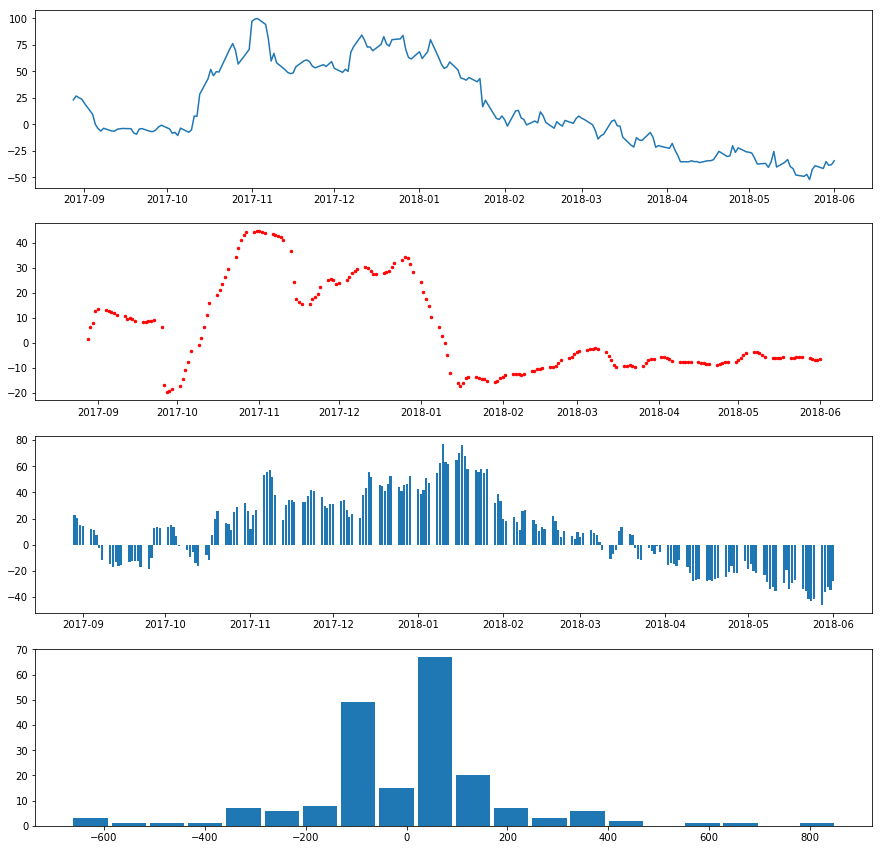

In [0]:
plot(residual_df["airtel"][-153:],forecasts_val[-150:],150)